In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [46]:
#Loading in data:
data = pd.read_csv('Data_for_UCI_named.csv')
data.head()

#Attribute Information:

#1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
#2. p[x]: nominal power consumed(negative)/produced(positive)(real). 
#For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
#3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). 
#g1 - the value for electricity producer.
#Target 1: stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
#Target 2: stabf: the stability label of the system (categorical: stable/unstable)

  

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


C:\Users\jacob\AppData\Local\Temp/ipykernel_18268/2858522980.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'tau1'}>,
        <AxesSubplot:title={'center':'tau2'}>,
        <AxesSubplot:title={'center':'tau3'}>,
        <AxesSubplot:title={'center':'tau4'}>],
       [<AxesSubplot:title={'center':'p1'}>,
        <AxesSubplot:title={'center':'p2'}>,
        <AxesSubplot:title={'center':'p3'}>,
        <AxesSubplot:title={'center':'p4'}>],
       [<AxesSubplot:title={'center':'g1'}>,
        <AxesSubplot:title={'center':'g2'}>,
        <AxesSubplot:title={'center':'g3'}>,
        <AxesSubplot:title={'center':'g4'}>],
       [<AxesSubplot:title={'center':'stab'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

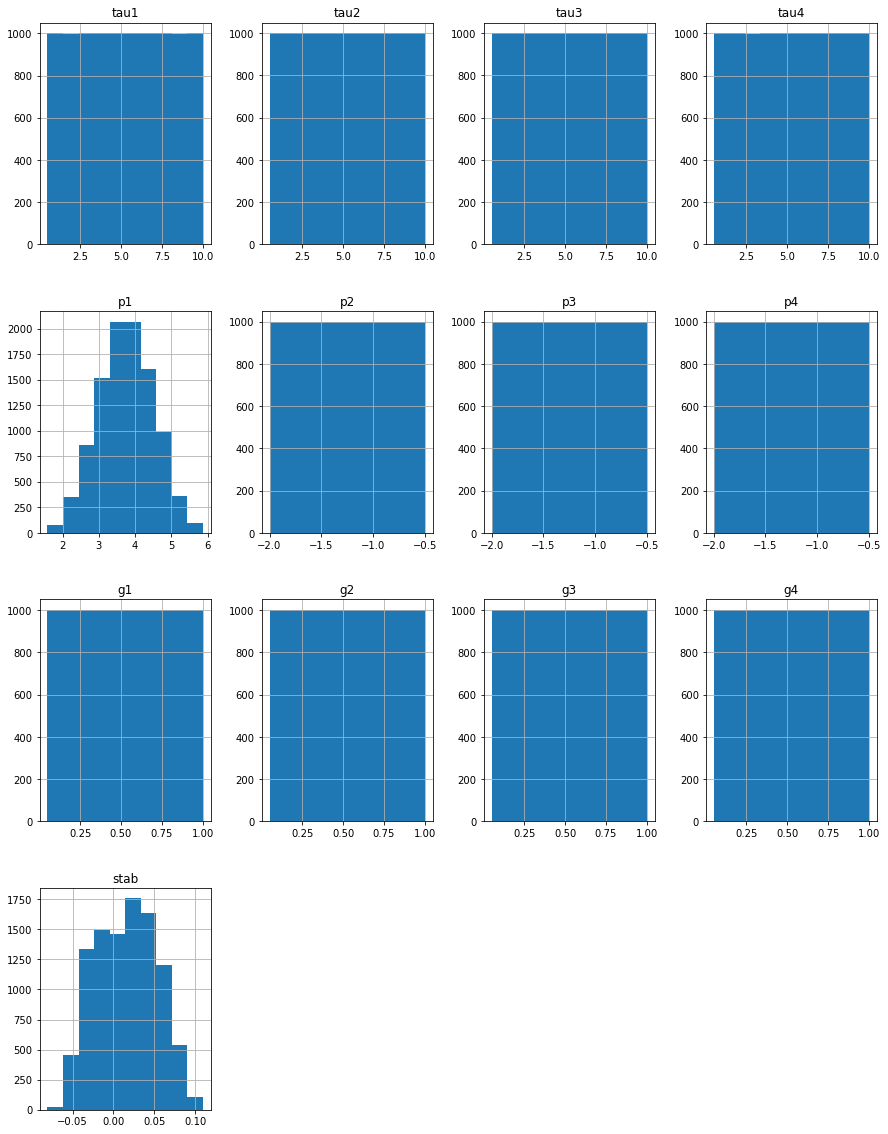

In [47]:
#Evaluating the attributes and explaining their distributions
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [48]:
#Based upon the graphs above. We can see that the graphs corresponding to tau1 - tau4, p2 - p4, and g1 - g4 are identical.
#The distribution that these graphs show is uniformly distributed with a value of 1000. This tells us that the values for
#electricity producers, the nominal power consumption (all except p1), and the gamma coefficient for electricity producers
#are uniformly distributed. This suggests a potential relation or common influences between these factors since they
#have the same histogram. This might also imply that a particular reading on tau might influence the reading of p and g
#(and vice versa). This could also mean that the selected dataset is chosen such to have this uniform distribution of 
#the majority of the variables.

#Looking at the non-uniform data, we see that p1 and stab's histograms can be described as approximately normal, with
#clear evidence of a central tendency. However, p1 is much concentrated around the center, whereas stab has a bit more
#variation. p1's graph being distinct from the other p(x) graphs makes sense because p1's formula is based upon the absolute
#sum of the other p(x)'s. stab's variation makes sense when considering it is part of a characteristic equation, which
#will naturally vary with different values. It should also be noted that stab is always positive, which indicates that
#all the measurements we have are linearly unstable systems.

#Lastly, stabf isn't shown on a histogram because it is categorical with only two possible values. This also indicates
#that predicting stabf is a classification problem, which will impact the chosen models.

In [49]:
#Given that stabf is a classification problem, I will construct a classification model to predict stabf
#based upon tau, b, and g values. 
#First, we must drop stab from the dataframe

df = data.drop(['stab'],axis=1)

#Now, we split the data into training and testing data with a split of 0.2
from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df, test_size = 0.2, random_state = 42)

#Now, reset the indices:
dftrain = dftrain.reset_index(drop=True)
dftest = dftest.reset_index(drop=True)

#Now, we create x and y data for the training and testing
ytrain = dftrain.pop('stabf')
xtrain = dftrain
ytest = dftest.pop('stabf')
xtest = dftest


#Additionally, scaling the x data will assist with our predictions:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [50]:
#For my model, I will be using a support vector machine in sklearn called Linear SVC, which stands for
#Linear Support Vector Classification
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(xtrain, ytrain)

#We only care about the prediction on the test data, so we will use this for confusion matrix and analysis
ytestpred = lin_svc.predict(xtest)

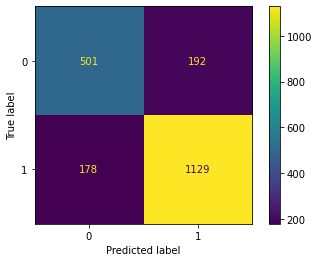

In [51]:
#Creating confusion matrix for the lin_svc classifier:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytestpred)

#Plotting the confusion matrix nicely
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
#Analyzing the above confusion matrix, we can see that we have 1129 true positives, 501 true negatives, 192 false positives
#and 178 false negatives. This tells us that the model is performing fairly well, given that it is overwhelmingly
#producing accurate results. To evaluate this model further, the precision and recalls can also be calculated. Shown below,
#the precision indicates
#FILL IN HERE
from sklearn.metrics import precision_score, recall_score

#
precisions = [0, 0, 0, 0, 0]
recalls = [0, 0, 0, 0, 0]

recalls[0] = precision_score(ytest,ytestpred, pos_label='stable')
precisions[0] = recall_score(ytest,ytestpred, pos_label = 'stable')

precision_score(ytest,ytestpred, pos_label='stable'), recall_score(ytest,ytestpred,pos_label = 'stable')

(0.7378497790868925, 0.7229437229437229)

In [53]:
#Evaluating the above results, we can see that the precision score and recall similar are quite similar, which tells us that
#the accuracy of the positive scores and the ratio of positive instances detected by the classifier are both around 70%. 
#This is a fairly strong classification, but can be compared to other metrics to evaluate further. 

In [54]:
#In the subsequent analysis, four different other sklearn classifiers are trained and utilized on the test data, and 
#precision and recall scores are calculated and reported. 
#These other classifiers utilized are NearestNeighbors, Decision Tree, Random Forest, and Naive Bayes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#Training each of the models
knn.fit(xtrain, ytrain)
dtc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)
gnb.fit(xtrain, ytrain)

#Testing the data for each of the models
knn_pred = knn.predict(xtest)
dtc_pred = dtc.predict(xtest)
rfc_pred = rfc.predict(xtest)
gnb_pred = gnb.predict(xtest)

#Precision score and recall score calculation 
precisions[1] = precision_score(ytest,knn_pred, pos_label='stable')
precisions[2] = precision_score(ytest,dtc_pred, pos_label='stable')
precisions[3] = precision_score(ytest,rfc_pred, pos_label='stable')
precisions[4] = precision_score(ytest,gnb_pred, pos_label='stable')

recalls[1] = recall_score(ytest,knn_pred,pos_label = 'stable')
recalls[2] = recall_score(ytest,dtc_pred,pos_label = 'stable')
recalls[3] = recall_score(ytest,rfc_pred,pos_label = 'stable')
recalls[4] = recall_score(ytest,gnb_pred,pos_label = 'stable')

prec_rec_df = pd.DataFrame()
prec_rec_df.index = ['LinearSVC', 'KNeighbors', 'DecisionTreeClassifier', 'Random Forest', 'GaussianNB']
prec_rec_df['Precision'] = precisions
prec_rec_df['Recall'] = recalls

prec_rec_df

,Precision,Recalls
LinearSVC,0.722944,0.737850
KNeighbors,0.832781,0.725830
DecisionTreeClassifier,0.766434,0.790765
Random Forest,0.871533,0.861472
GaussianNB,0.798347,0.696970


In [ ]:
#Based on the reported precisions and recalls, it is seen that Random Forest has the highest precision and recall, thus
#this method would be recommended out of the 5 chosen methods for future analysis, since it generalizes the best.